In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.ticker as ticker

In [10]:
df = pd.read_csv('data/SalaryCap_only.csv')
df['NBA_Cap_Roster'] = df['nba_salary_cap'] / 15
df['MLB_Cap_Roster'] = df['mlb_comp_balance'] / 26
df['NFL_Cap_Roster'] = df['mlb_comp_balance'] / 53
df.head()

,year,nba_salary_cap,nba_cap_delta_dollar,nba_cap_delta_percent,mlb_comp_balance,mlb_cap_delta_dollar,mlb_cap_delta_percent,nfl_salary_cap,nfl_cap_delta_dollar,nfl_cap_delta_percent,NBA_Cap_Roster,MLB_Cap_Roster,NFL_Cap_Roster
0,2023,134000000,10345000,0.0837,233000000,3000000.0,0.0130,224800000,16600000,0.0797,8.933333e+06,8.961538e+06,4.241509e+06
1,2022,123655000,11241000,0.1000,230000000,20000000.0,0.0952,208200000,25700000,0.1408,8.243667e+06,8.846154e+06,3.928302e+06
2,2021,112414000,3274000,0.0300,210000000,2000000.0,0.0096,182500000,-15700000,-0.0792,7.494267e+06,8.076923e+06,3.443396e+06
3,2020,109140000,0,0.0000,208000000,2000000.0,0.0097,198200000,10000000,0.0531,7.276000e+06,8.000000e+06,3.739623e+06
4,2019,109140000,7271000,0.0714,206000000,9000000.0,0.0457,188200000,11000000,0.0621,7.276000e+06,7.923077e+06,3.550943e+06


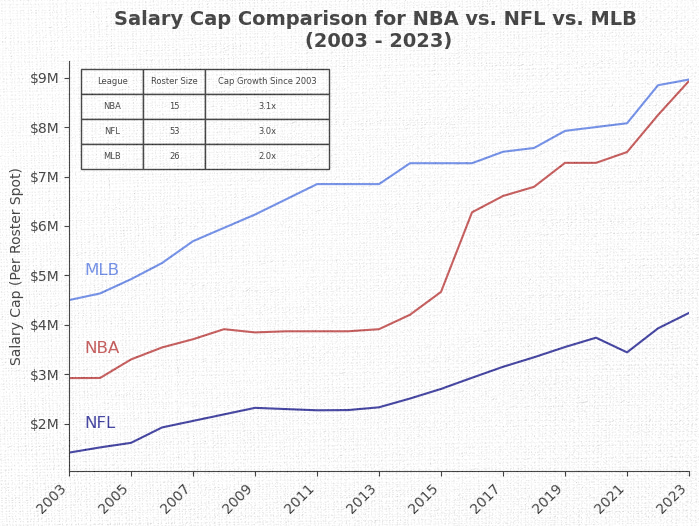

In [124]:
# Convert the logo images to numpy arrays
nfl_logo = plt.imread('logos/nfl_logo.png')
nba_logo = plt.imread('logos/nbalogo.png')
mlb_logo = plt.imread('logos/mlb_logo.jpeg')
background = plt.imread('logos/background.jpeg')

# Set the figure size and style
fig, ax = plt.subplots(figsize=(20, 16))
plt.style.use('default')

#Set buffer size to 0.5 million
buffer = 5e5

"""League Line Plots"""
#Plot the NBA line and set the line color to a dark red
ax.plot(df['year'].to_numpy(), df['NBA_Cap_Roster'].to_numpy(),label='NBA', color='firebrick')
ax.text(2003.5, df['NBA_Cap_Roster'].min() + buffer, 'NBA', 
        fontsize=12,  ha='left', color='firebrick')
#Plot the NFL line and set the line color to a dark navy blue
ax.plot(df['year'].to_numpy(), df['NFL_Cap_Roster'].to_numpy(),label='NFL', color='navy')
ax.text(2003.5, df['NFL_Cap_Roster'].min() + buffer, 'NFL', 
        fontsize=12,  ha='left', color='navy')
#Plot the MLB Line
ax.plot(df['year'].to_numpy(), df['MLB_Cap_Roster'].to_numpy(),label='MLB', color='royalblue')
ax.text(2003.5, df['MLB_Cap_Roster'].min() + buffer, 'MLB', 
        fontsize=12, ha='left', color='royalblue')


# Remove the grid background
ax.grid(False)
# Set the background image
fig.figimage(background, 0, 0, alpha=0.3, resize = True, zorder=0)

""" X-Axis """
# Set the x-axis tick labels
ax.set_xticks(df['year'])
ax.set_xticklabels(df['year'], rotation=45, ha='right')
# Set the x-axis formatter to display years without decimals
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
#Start the x-axis tick labels at 2003 and end at 2023 and only every odd year
ax.set_xlim(df['year'].min(), df['year'].max())
ax.set_xticks(np.arange(df['year'].min(), df['year'].max()+1, 2))

""" Y-Axis """
# Set the y-axis label with salary in millions formatting
ax.set_ylabel('Salary Cap (Per Roster Spot)')
# Set the y-axis formatter to display salary in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.0f}M'.format(x / 1e6)))


# Set the title, bold the text, enlarge the font size, and add some padding
ax.set_title('Salary Cap Comparison for NBA vs. NFL vs. MLB \n(2003 - 2023)',
                   fontweight='bold', fontsize=14, pad=10)


# Calculate the growth in salary cap for each league
nba_growth = round((df['NBA_Cap_Roster'].max() / df['NBA_Cap_Roster'].min()), 1)
nfl_growth = round((df['NFL_Cap_Roster'].max() / df['NFL_Cap_Roster'].min()), 1)
mlb_growth = round((df['MLB_Cap_Roster'].max() / df['MLB_Cap_Roster'].min()), 1)

data = [
    ['NBA', '15', f'{nba_growth}x'],
    ['NFL', '53', f'{nfl_growth}x'],
    ['MLB', '26', f'{mlb_growth}x']
]

# Create the table legend with bolded column headers and the
table = plt.table(cellText=data, loc='upper left', 
                  colWidths=[0.1, 0.1, 0.2],
                  cellLoc='center', colLabels=['League', 'Roster Size', 'Cap Growth Since 2003'])


# Style the table
table.auto_set_font_size(True)
#table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the scale to increase spacing


sns.despine()

# Show the plot
plt.show()

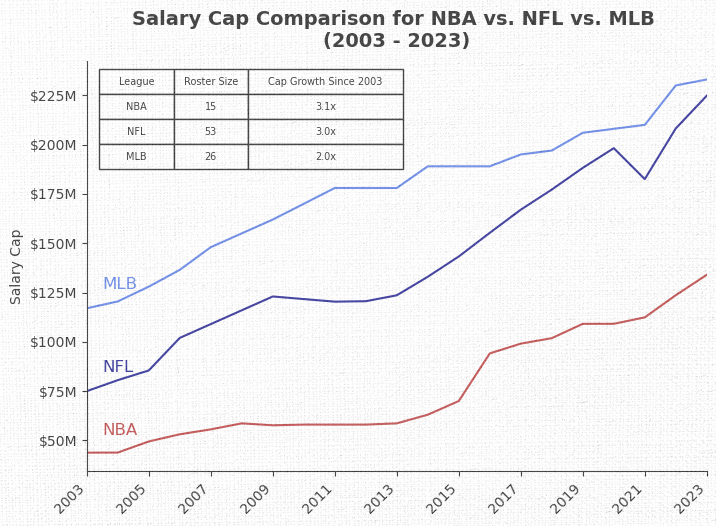

In [316]:
# Convert the logo images to numpy arrays
nfl_logo = plt.imread('logos/nfl_logo.png')
nba_logo = plt.imread('logos/nbalogo.png')
mlb_logo = plt.imread('logos/mlb_logo.jpeg')
background = plt.imread('logos/background.jpeg')

# Set the figure size and style
fig, ax = plt.subplots(figsize=(20, 16))
plt.style.use('default')

#Set buffer size to 0.5 million
buffer = 9e6

"""League Line Plots"""
#Plot the NBA line and set the line color to a dark red
ax.plot(df['year'].to_numpy(), df['nba_salary_cap'].to_numpy(),label='NBA', color='firebrick')
ax.text(2003.5, df['nba_salary_cap'].min() + buffer, 'NBA', 
        fontsize=12,  ha='left', color='firebrick')
#Plot the NFL line and set the line color to a dark navy blue
ax.plot(df['year'].to_numpy(), df['nfl_salary_cap'].to_numpy(),label='NFL', color='navy')
ax.text(2003.5, df['nfl_salary_cap'].min() + buffer + 9e5, 'NFL', 
        fontsize=12,  ha='left', color='navy')
#Plot the MLB Line
ax.plot(df['year'].to_numpy(), df['mlb_comp_balance'].to_numpy(),label='MLB', color='royalblue')
ax.text(2003.5, df['mlb_comp_balance'].min() + buffer + 9e5, 'MLB', 
        fontsize=12, ha='left', color='royalblue')


# Remove the grid background
ax.grid(False)
# Set the background image
fig.figimage(background, 0, 0, alpha=0.3, resize = True, zorder=0)

""" X-Axis """
# Set the x-axis tick labels
ax.set_xticks(df['year'])
ax.set_xticklabels(df['year'], rotation=45, ha='right')
# Set the x-axis formatter to display years without decimals
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
#Start the x-axis tick labels at 2003 and end at 2023 and only every odd year
ax.set_xlim(df['year'].min(), df['year'].max())
ax.set_xticks(np.arange(df['year'].min(), df['year'].max()+1, 2))

""" Y-Axis """
# Set the y-axis label with salary in millions formatting
ax.set_ylabel('Salary Cap')
# Set the y-axis formatter to display salary in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.0f}M'.format(x / 1e6)))


# Set the title, bold the text, enlarge the font size, and add some padding
ax.set_title('Salary Cap Comparison for NBA vs. NFL vs. MLB \n(2003 - 2023)',
                   fontweight='bold', fontsize=14, pad=10)


# Calculate the growth in salary cap for each league
nba_growth = round((df['NBA_Cap_Roster'].max() / df['NBA_Cap_Roster'].min()), 1)
nfl_growth = round((df['NFL_Cap_Roster'].max() / df['NFL_Cap_Roster'].min()), 1)
mlb_growth = round((df['MLB_Cap_Roster'].max() / df['MLB_Cap_Roster'].min()), 1)

data = [
    ['NBA', '15', f'{nba_growth}x'],
    ['NFL', '53', f'{nfl_growth}x'],
    ['MLB', '26', f'{mlb_growth}x']
]

# Create the table legend with bolded column headers and the
table = plt.table(cellText=data, loc='upper left', 
                  colWidths=[0.12, 0.12, 0.25],
                  cellLoc='center', colLabels=['League', 'Roster Size', 'Cap Growth Since 2003'])


# Style the table
table.auto_set_font_size(True)
#table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the scale to increase spacing

sns.despine()

# Show the plot
plt.show()

## Adjust for Inflation

In [13]:
#Ingest inflation data
inflation_df = pd.read_csv('data/CPI.csv')
nba_df = pd.read_csv('data/NBA_SalaryCap.csv')
nfl_df = pd.read_csv('data/NFL_SalaryCap.csv')
mlb_df = pd.read_csv('data/MLB_SalaryCap.csv')

In [49]:
def calculate_inflation_adjustment(league_df, inflation_df):
    df = league_df.copy()
    #Reverse the order of the data frame
    df = df.iloc[::-1]
    #Join the inflation data to the salary cap data
    df = df.merge(inflation_df, how='left', on = 'Year')
    
    #Find the first 3 characters of the 2nd column name as league name
    league = df.columns[1][:3]
    if league == 'mlb':
        salary_cap = league + '_comp_balance'
    else:
        salary_cap = league + '_salary_cap'

    #Calculate the inflation adjusted salary cap
    df['inflation_adjusted_cap'] = round(df[salary_cap] * (df['CPI'].iloc[0])/df['CPI'],0)
    #Calculate inflation adjusted percentage change from previous year
    df['inflation_adjusted_percent_change'] = round(df['inflation_adjusted_cap'].pct_change(), 4)

    #Drop the CPI columns
    #df.drop(columns=['CPI', 'Percent_Change'], inplace=True)

    #Move the 2 inflation adjusted columns to the 5th and 6th columns
    cols = list(df.columns)
    cols = cols[:4] + cols[-2:] + cols[4:-2]
    df = df[cols]
 
    return df

In [50]:
nfl_df2 = calculate_inflation_adjustment(nba_df, inflation_df)
nfl_df2 = calculate_inflation_adjustment(nfl_df, inflation_df)
nfl_df2 = calculate_inflation_adjustment(mlb_df, inflation_df)

## NBA Visualization

In [51]:
#Add the columns of commissioner to the nbadataframe based on the following years: David Stern 1984-2014, Adam Silver 2014-Present
nfl_df2['commissioner'] = np.where(nfl_df2['Year'] < 2014, 'David Stern', 'Adam Silver')
nfl_df2.head()

,Year,nba_salary_cap,nba_cap_delta_dollar,nba_cap_delta_percent,inflation_adjusted_cap,inflation_adjusted_percent_change,nba_highest_cap_team,nba_cap_max,nba_lowest_cap_team,nba_cap_min,nba_highest_paid_player,nba_highest_player_salary,CPI,Percent_Change,commissioner
0,1984,3600000,NaN,NaN,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.9,0.043,David Stern
1,1985,4233000,633000.0,0.1758,4087441.0,0.1354,NaN,NaN,NaN,NaN,NaN,NaN,107.6,0.035,David Stern
2,1986,4945000,712000.0,0.1682,4687824.0,0.1469,NaN,NaN,NaN,NaN,NaN,NaN,109.6,0.019,David Stern
3,1987,6164000,1219000.0,0.2465,5637673.0,0.2026,NaN,NaN,NaN,NaN,NaN,NaN,113.6,0.037,David Stern
4,1988,7323000,1159000.0,0.1880,6431612.0,0.1408,NaN,NaN,NaN,NaN,NaN,NaN,118.3,0.041,David Stern


In [263]:
def nba_plot(nfl_df2):
    ''' Plot the NBA Salary Cap to show growth over time while accounting for inflation'''
    # Set the figure size and style
    fig, ax = plt.subplots(figsize=(20, 16))
    plt.style.use('default')

    #Plot a solid line for salary cap, and a dotted line for inflation adjusted salary cap with the same Y-axis
    ax.plot(nfl_df2['Year'].to_numpy(), nfl_df2['nba_salary_cap'].to_numpy(),label='Salary Cap', color='firebrick')
    ax.plot(nfl_df2['Year'].to_numpy(), nfl_df2['inflation_adjusted_cap'].to_numpy(),label='Inflation Adj. Salary Cap', color='firebrick', linestyle='dotted')

    # Remove the grid background
    ax.grid(False)
    # Set the background image
    fig.figimage(background, 0, 0, alpha=0.3, resize = True, zorder=0)

    # Add the NFL Logo as another background image that is located in the center of the plot
    fig.figimage(nba_logo, 200, 150, alpha=0.3, resize = False, zorder=0)

    """ X-Axis """
    # Set the x-axis tick labels
    ax.set_xticks(nfl_df2['Year'])
    ax.set_xticklabels(nfl_df2['Year'], rotation=45, ha='right')
    # Set the x-axis formatter to display years without decimals
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    # Start the x-axis tick labels at 1984 and end at 2023 and only every 4 years
    ax.set_xlim(nfl_df2['Year'].min(), nfl_df2['Year'].max())
    ax.set_xticks(np.arange(nfl_df2['Year'].min(), nfl_df2['Year'].max()+1, 4))

    """ Y-Axis """
    # Set the y-axis label with salary in millions formatting
    ax.set_ylabel('Salary Cap')
    # Set the y-axis formatter to display salary in millions
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.0f}M'.format(x / 1e6)))

    # Set the title, bold the text, enlarge the font size, and add some padding
    ax.set_title('NBA Salary Cap Growth\n(1984 - 2023)',
                          fontweight='bold', fontsize=14, pad=10)
    
    #Calculate the growth in salary cap (adjusted for inflation) for each commissioner
    min_cap = nfl_df2['inflation_adjusted_cap'].min()
    max_cap = nfl_df2['inflation_adjusted_cap'].max()
    cap_2014 = nfl_df2['inflation_adjusted_cap'].iloc[30]

    stern_growth_percent = round(
        (cap_2014 - min_cap) / min_cap / (2014-1984) * 100, 1)
    stern_growth_raw = round(
        (cap_2014 - min_cap) / (2014-1984), 0)
    silver_growth_percent = round(
        (max_cap - cap_2014) / cap_2014 / (2023 - 2014) * 100, 1)
    silver_growth_raw = round(
        (max_cap - cap_2014) / (2023 - 2014), 0)
    
    # Add the commissioner name and tenure to the plot
    #ax.text(2008, nfl_df2['nba_salary_cap'].min() + 1e6, f'{nfl_df2["commissioner"].iloc[0]} (1984 - 2014)\n{stern_growth}% Annual Growth\n(Inflation Adj.)',
            #fontsize=8, ha='right')
    #ax.text(2016, nfl_df2['inflation_adjusted_cap'].max() + 5e6, f'{nfl_df2["commissioner"].iloc[-1]} (2014 - Present)\n{silver_growth}% Annual Growth\n(Inflation Adj.)',
            #fontsize=8, ha='left')
    
    data = [
    ['David Stern', '1984 - 2014', f'{stern_growth_percent}%', 
     #f'${stern_growth_percent}M'
     ],
    ['Adam Silver', '2014 - Present', f'{silver_growth_percent}%',
      #f'${silver_growth_percent}M'
      ]
    ]

    # Create the table legend with bolded column headers and the
    table = plt.table(cellText=data, loc='upper left', 
                    colWidths=[0.15, 0.15, 0.3],
                    cellLoc='center', colLabels=['Commissioner', 'Years', 'Annual Cap Growth % (Infl. Adj.)'])
    
    #Show the legend
    ax.legend(loc='lower right', fontsize=8)
    #Remove the top and right spines
    sns.despine()
    

    #Show the plot
    return plt.show()

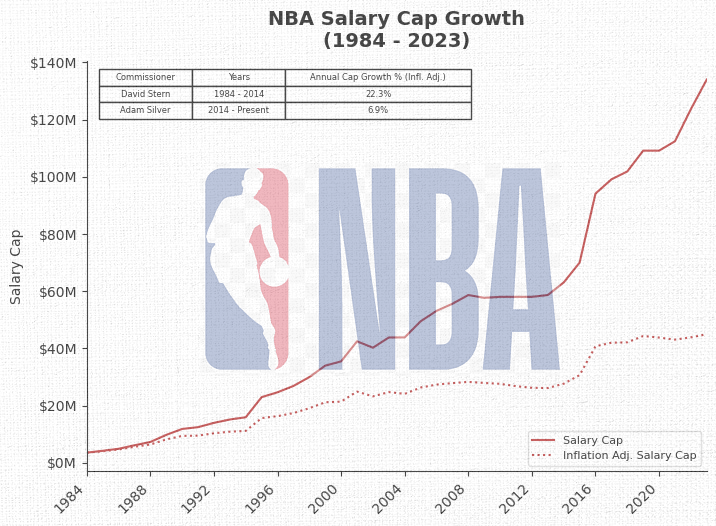

In [253]:
nba_plot(nfl_df2)

## NFL Visualization

In [292]:
#Add the columns of commissioner to the nfl dataframe based on the following years: Paul Tagliabue 1989-2006, Roger Goodell 2006-Present
nfl_df2['commissioner'] = np.where(nfl_df2['Year'] < 2006, 'Paul Tagliabue', 'Roger Goodell')
nfl_df2.head()

,Year,nfl_salary_cap,nfl_cap_delta_dollar,nfl_cap_delta_percent,inflation_adjusted_cap,inflation_adjusted_percent_change,nfl_highest_cap_team,nfl_cap_max,nfl_lowest_cap_team,nfl_cap_min,nfl_highest_paid_player,nfl_highest_player_salary,CPI,Percent_Change,commissioner
0,1994,34608000,NaN,NaN,34608000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.2,0.026,Paul Tagliabue
1,1995,37100000,2492000.0,0.0720,36077559.0,0.0425,NaN,NaN,NaN,NaN,NaN,NaN,152.4,0.028,Paul Tagliabue
2,1996,40753000,3653000.0,0.0985,38493273.0,0.0670,NaN,NaN,NaN,NaN,NaN,NaN,156.9,0.029,Paul Tagliabue
3,1997,41454000,701000.0,0.0172,38277151.0,-0.0056,NaN,NaN,NaN,NaN,NaN,NaN,160.5,0.023,Paul Tagliabue
4,1998,52388000,10934000.0,0.2638,47631298.0,0.2444,NaN,NaN,NaN,NaN,NaN,NaN,163.0,0.016,Paul Tagliabue


In [290]:
def nfl_plot(nfl_df2):
    ''' Plot the NFL Salary Cap to show growth over time while accounting for inflation'''
    # Set the figure size and style
    fig, ax = plt.subplots(figsize=(20, 16))
    plt.style.use('default')

    #Plot a solid line for salary cap, and a dotted line for inflation adjusted salary cap with the same Y-axis
    ax.plot(nfl_df2['Year'].to_numpy(), nfl_df2['nfl_salary_cap'].to_numpy(),label='Salary Cap', color='navy')
    ax.plot(nfl_df2['Year'].to_numpy(), nfl_df2['inflation_adjusted_cap'].to_numpy(),label='Inflation Adj. Salary Cap', color='navy', linestyle='dotted')

    # Remove the grid background
    ax.grid(False)
    # Set the background image
    fig.figimage(background, 0, 0, alpha=0.3, resize = True, zorder=0)
    #Resize the NFL Logo to be 1/3 of the size
    nfl_logo = plt.imread('logos/nfl_logo.png')
    nfl_logo = nfl_logo[::5, ::5]
    # Add the NFL Logo as another background image that is located in the center of the plot
    fig.figimage(nfl_logo, 300, 80, alpha=0.3, resize = False, zorder=0)

    """ X-Axis """
    # Set the x-axis tick labels
    ax.set_xticks(nfl_df2['Year'])
    ax.set_xticklabels(nfl_df2['Year'], rotation=45, ha='right')
    # Set the x-axis formatter to display years without decimals
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    # Start the x-axis tick labels at 1984 and end at 2023 and only every 4 years
    ax.set_xlim(nfl_df2['Year'].min(), nfl_df2['Year'].max())
    ax.set_xticks(np.arange(nfl_df2['Year'].min(), nfl_df2['Year'].max()+1, 4))

    """ Y-Axis """
    # Set the y-axis label with salary in millions formatting
    ax.set_ylabel('Salary Cap')
    # Set the y-axis formatter to display salary in millions
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.0f}M'.format(x / 1e6)))

    # Set the title, bold the text, enlarge the font size, and add some padding
    ax.set_title('NFL Salary Cap Growth\n(1994 - 2023)',
                          fontweight='bold', fontsize=14, pad=10)
    
    #Calculate the growth in salary cap (adjusted for inflation) for each commissioner
    min_cap = nfl_df2['inflation_adjusted_cap'].min()
    max_cap = nfl_df2['inflation_adjusted_cap'].max()
    cap_2006 = nfl_df2['inflation_adjusted_cap'].iloc[13]

    paul_growth_percent = round(
        (cap_2006 - min_cap) / min_cap / (2014-1984) * 100, 1)
    paul_growth_raw = round(
        (cap_2006 - min_cap) / (2006-1994), 0)
    roger_growth_percent = round(
        (max_cap - cap_2006) / cap_2006 / (2023 - 2006) * 100, 1)
    roger_growth_raw = round(
        (max_cap - cap_2006) / (2023 - 2006), 0)
    
    # Add the commissioner name and tenure to the plot
    #ax.text(2008, nfl_df2['nba_salary_cap'].min() + 1e6, f'{nfl_df2["commissioner"].iloc[0]} (1984 - 2014)\n{stern_growth}% Annual Growth\n(Inflation Adj.)',
            #fontsize=8, ha='right')
    #ax.text(2016, nfl_df2['inflation_adjusted_cap'].max() + 5e6, f'{nfl_df2["commissioner"].iloc[-1]} (2014 - Present)\n{silver_growth}% Annual Growth\n(Inflation Adj.)',
            #fontsize=8, ha='left')
    
    data = [
    ['Paul Tagliabue', '1984 - 2014', f'{paul_growth_percent}%', 
     #f'${stern_growth_percent}M'
     ],
    ['Roger Goodell', '2014 - Present', f'{roger_growth_percent}%',
      #f'${silver_growth_percent}M'
      ]
    ]

    # Create the table legend with bolded column headers and the
    table = plt.table(cellText=data, loc='upper left', 
                    colWidths=[0.2, 0.2, 0.37],
                    cellLoc='center', colLabels=['Commissioner', 'Years', 'Annual Cap Growth % (Infl. Adj.)'])
    
    #Show the legend
    ax.legend(loc='lower right', fontsize=8)
    #Remove the top and right spines
    sns.despine()
    
    #Show the plot
    return plt.show()

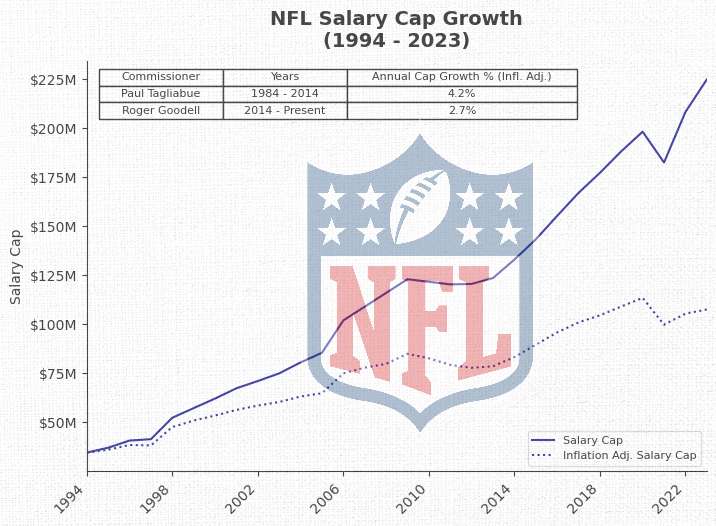

In [291]:
nfl_plot(nfl_df2)

## MLB Visualization

In [304]:
#Add MLB Commissioner to the dataframe based on the following years: Bud Selig 1992-2015, Rob Manfred 2015-Present
nfl_df2['commissioner'] = np.where(nfl_df2['Year'] < 2015, 'Bud Selig', 'Rob Manfred')
nfl_df2.head(15)

,Year,mlb_comp_balance,mlb_cap_delta_dollar,mlb_cap_delta_percent,inflation_adjusted_cap,inflation_adjusted_percent_change,mlb_highest_cap_team,mlb_cap_max,mlb_lowest_cap_team,mlb_cap_min,mlb_highest_paid_player,mlb_highest_player_salary,CPI,Percent_Change,commissioner
0,2003,117000000,NaN,NaN,117000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.0,0.023,Bud Selig
1,2004,120500000,3500000.0,0.0299,117374272.0,0.0032,NaN,NaN,NaN,NaN,NaN,NaN,188.9,0.027,Bud Selig
2,2005,128000000,7500000.0,0.0622,120593958.0,0.0274,NaN,NaN,NaN,NaN,NaN,NaN,195.3,0.034,Bud Selig
3,2006,136500000,8500000.0,0.0664,124583333.0,0.0331,NaN,NaN,NaN,NaN,NaN,NaN,201.6,0.032,Bud Selig
4,2007,148000000,11500000.0,0.0842,131365171.0,0.0544,NaN,NaN,NaN,NaN,NaN,NaN,207.3,0.029,Bud Selig
5,2008,155000000,7000000.0,0.0473,132466326.0,0.0084,NaN,NaN,NaN,NaN,NaN,NaN,215.3,0.038,Bud Selig
6,2009,162000000,7000000.0,0.0452,138965035.0,0.0491,NaN,NaN,NaN,NaN,NaN,NaN,214.5,-0.004,Bud Selig
7,2010,170000000,8000000.0,0.0494,143420449.0,0.0321,NaN,NaN,NaN,NaN,NaN,NaN,218.1,0.016,Bud Selig
8,2011,178000000,8000000.0,0.0471,145629169.0,0.0154,New York Yankees,212236399.0,Tampa Bay Rays,45756925.0,Alex Rodriguez,32000000.0,224.9,0.032,Bud Selig
9,2012,178000000,0.0,0.0000,142648084.0,-0.0205,New York Yankees,228085456.0,Houston Astros,54547239.0,Alex Rodriguez,30000000.0,229.6,0.021,Bud Selig


In [313]:
def mlb_plot(nfl_df2):
    ''' Plot the NFL Salary Cap to show growth over time while accounting for inflation'''
    # Set the figure size and style
    fig, ax = plt.subplots(figsize=(20, 16))
    plt.style.use('default')

    #Plot a solid line for salary cap, and a dotted line for inflation adjusted salary cap with the same Y-axis
    ax.plot(nfl_df2['Year'].to_numpy(), nfl_df2['mlb_comp_balance'].to_numpy(),label='Tax Comp Balance', color='royalblue')
    ax.plot(nfl_df2['Year'].to_numpy(), nfl_df2['inflation_adjusted_cap'].to_numpy(),label='Inflation Adj. Tax Comp Balance', color='royalblue', linestyle='dotted')

    # Remove the grid background
    ax.grid(False)
    # Set the background image
    fig.figimage(background, 0, 0, alpha=0.3, resize = True, zorder=0)
    #Resize the MLB Logo to be 1/3 of the size
    mlb_logo = plt.imread('logos/mlb_logo.jpeg')
    mlb_logo = mlb_logo[::8, ::8]
    # Add the NFL Logo as another background image that is located in the center of the plot
    fig.figimage(mlb_logo, 250, 150, alpha=0.3, resize = False, zorder=0)

    """ X-Axis """
    # Set the x-axis tick labels
    ax.set_xticks(nfl_df2['Year'])
    ax.set_xticklabels(nfl_df2['Year'], rotation=45, ha='right')
    # Set the x-axis formatter to display years without decimals
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    # Start the x-axis tick labels at 1984 and end at 2023 and only every 4 years
    ax.set_xlim(nfl_df2['Year'].min(), nfl_df2['Year'].max())
    ax.set_xticks(np.arange(nfl_df2['Year'].min(), nfl_df2['Year'].max()+1, 4))

    """ Y-Axis """
    # Set the y-axis label with salary in millions formatting
    ax.set_ylabel('Tax Comp Balance')
    # Set the y-axis formatter to display salary in millions
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.0f}M'.format(x / 1e6)))

    # Set the title, bold the text, enlarge the font size, and add some padding
    ax.set_title('MLB Tax Comp Balance Growth\n(2003 - 2023)',
                          fontweight='bold', fontsize=14, pad=10)
    
    #Calculate the growth in salary cap (adjusted for inflation) for each commissioner
    min_cap = nfl_df2['inflation_adjusted_cap'].min()
    max_cap = nfl_df2['inflation_adjusted_cap'].max()
    cap_2015 = nfl_df2['inflation_adjusted_cap'].iloc[13]

    bud_growth_percent = round(
        (cap_2015 - min_cap) / min_cap / (2015-2003) * 100, 1)
    rob_growth_percent = round(
        (max_cap - cap_2015) / cap_2015 / (2023 - 2015) * 100, 1)
    
    # Add the commissioner name and tenure to the plot
    #ax.text(2008, nfl_df2['nba_salary_cap'].min() + 1e6, f'{nfl_df2["commissioner"].iloc[0]} (1984 - 2014)\n{stern_growth}% Annual Growth\n(Inflation Adj.)',
            #fontsize=8, ha='right')
    #ax.text(2016, nfl_df2['inflation_adjusted_cap'].max() + 5e6, f'{nfl_df2["commissioner"].iloc[-1]} (2014 - Present)\n{silver_growth}% Annual Growth\n(Inflation Adj.)',
            #fontsize=8, ha='left')
    
    data = [
    ['Bud Selig', '1992 - 2015', f'{bud_growth_percent}%', 
     #f'${stern_growth_percent}M'
     ],
    ['Rob Manfred', '2015 - Present', f'{rob_growth_percent}%',
      #f'${silver_growth_percent}M'
      ]
    ]

    # Create the table legend with bolded column headers and the
    table = plt.table(cellText=data, loc='upper left', 
                    colWidths=[0.2, 0.2, 0.37],
                    cellLoc='center', colLabels=['Commissioner', 'Years', 'Annual Tax Comp Balance % (Infl. Adj.)'])
    
    #Show the legend
    ax.legend(loc='lower right', fontsize=8)
    #Remove the top and right spines
    sns.despine()
    
    #Show the plot
    return plt.show()

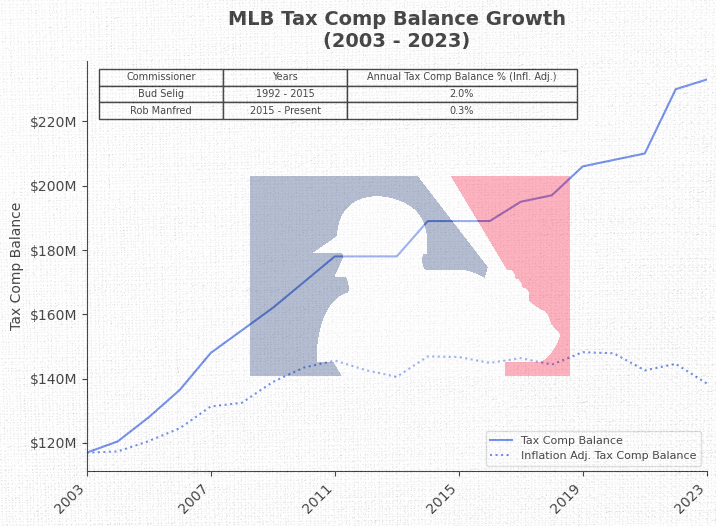

In [314]:
mlb_plot(nfl_df2)